In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [59]:
data = pd.read_csv('kpop_clean_data.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

data.head()

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,artist_JEON SOMI,artist_MAMAMOO,artist_Others,artist_Red Velvet,artist_SEVENTEEN,artist_Stray Kids,artist_TOMORROW X TOGETHER,artist_TWICE,artist_aespa,artist_j-hope
0,78,168.227,0,0.826,0.553,1,-10.121,0,0.2340,0.16300,...,0,0,1,0,0,0,0,0,0,0
1,73,169.566,0,0.752,0.642,3,-5.165,0,0.0869,0.08610,...,0,0,1,0,0,0,0,0,0,0
2,73,200.689,0,0.804,0.652,8,-6.282,1,0.0898,0.02670,...,0,0,1,0,0,0,0,0,0,0
3,79,207.481,0,0.566,0.716,1,-5.733,1,0.0424,0.00691,...,0,0,0,0,0,0,0,0,0,0
4,85,199.053,0,0.746,0.765,6,-4.410,0,0.0993,0.01120,...,0,0,0,0,0,0,0,0,0,0


In [60]:
data.isnull().sum()

popularity                    0
duration                      0
explicit                      0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
time_signature                0
artist_BLACKPINK              0
artist_BTS                    0
artist_ENHYPEN                0
artist_ITZY                   0
artist_IU                     0
artist_JEON SOMI              0
artist_MAMAMOO                0
artist_Others                 0
artist_Red Velvet             0
artist_SEVENTEEN              0
artist_Stray Kids             0
artist_TOMORROW X TOGETHER    0
artist_TWICE                  0
artist_aespa                  0
artist_j-hope                 0
dtype: int64

In [61]:
data.duplicated().sum()

0

In [62]:
data.describe()

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,artist_JEON SOMI,artist_MAMAMOO,artist_Others,artist_Red Velvet,artist_SEVENTEEN,artist_Stray Kids,artist_TOMORROW X TOGETHER,artist_TWICE,artist_aespa,artist_j-hope
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,68.707434,205.919827,0.009592,0.658072,0.747631,5.338129,-4.490633,0.558753,0.100576,0.142958,...,0.014388,0.011990,0.270983,0.014388,0.033573,0.052758,0.031175,0.040767,0.016787,0.023981
std,7.715853,31.046611,0.097587,0.121928,0.154256,3.564422,1.825174,0.497133,0.095744,0.199050,...,0.119229,0.108973,0.445001,0.119229,0.180344,0.223818,0.173999,0.197988,0.128625,0.153173
min,0.000000,58.871000,0.000000,0.294000,0.166000,0.000000,-14.867000,0.000000,0.024400,0.000253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,186.964000,0.000000,0.577000,0.676000,2.000000,-5.349000,0.000000,0.046100,0.015500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,203.731000,0.000000,0.667000,0.786000,6.000000,-4.388000,1.000000,0.071900,0.052500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,225.817000,0.000000,0.748000,0.861000,8.000000,-3.192000,1.000000,0.110000,0.172000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,323.360000,1.000000,0.935000,0.993000,11.000000,-0.173000,1.000000,0.889000,0.948000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's define songs that have popularity score of **greater than or equal to 70 as popular** and less than 70 to be non-popular.

In [63]:
data['popular'] = np.where(data['popularity']>=70, 1, 0)

data.sample(n=10)

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,artist_MAMAMOO,artist_Others,artist_Red Velvet,artist_SEVENTEEN,artist_Stray Kids,artist_TOMORROW X TOGETHER,artist_TWICE,artist_aespa,artist_j-hope,popular
376,0,219.493,0,0.727,0.937,11,-2.871,0,0.2860,0.00417,...,0,1,0,0,0,0,0,0,0,0
120,70,238.861,0,0.461,0.776,6,-4.498,1,0.0565,0.01490,...,0,0,0,0,0,0,0,0,0,1
405,66,197.746,0,0.691,0.859,1,-4.118,1,0.1120,0.03020,...,0,1,0,0,0,0,0,0,0,0
340,62,246.817,0,0.577,0.811,9,-5.146,0,0.1170,0.11100,...,0,0,0,0,0,0,0,0,0,0
215,68,192.280,0,0.692,0.881,11,-2.563,0,0.0461,0.04570,...,0,1,0,0,0,0,0,0,0,0
23,78,184.248,1,0.693,0.606,7,-5.997,1,0.0308,0.00817,...,0,0,0,0,0,0,0,0,0,1
162,69,225.012,0,0.720,0.824,10,-5.086,0,0.1280,0.03940,...,0,0,0,0,0,0,0,0,0,0
159,69,251.279,0,0.568,0.793,1,-3.749,1,0.0406,0.18900,...,0,0,0,0,0,0,0,0,0,0
363,71,164.441,0,0.759,0.459,8,-5.187,1,0.0948,0.00323,...,0,0,0,0,0,0,0,0,0,1
44,72,168.085,0,0.311,0.607,1,-6.578,1,0.1100,0.01740,...,0,1,0,0,0,0,0,0,0,1


In [64]:
data.drop('popularity', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   duration                    417 non-null    float64
 1   explicit                    417 non-null    int64  
 2   danceability                417 non-null    float64
 3   energy                      417 non-null    float64
 4   key                         417 non-null    int64  
 5   loudness                    417 non-null    float64
 6   mode                        417 non-null    int64  
 7   speechiness                 417 non-null    float64
 8   acousticness                417 non-null    float64
 9   instrumentalness            417 non-null    float64
 10  liveness                    417 non-null    float64
 11  valence                     417 non-null    float64
 12  tempo                       417 non-null    float64
 13  time_signature              417 non

0    228
1    189
Name: popular, dtype: int64


<Axes: xlabel='popular', ylabel='count'>

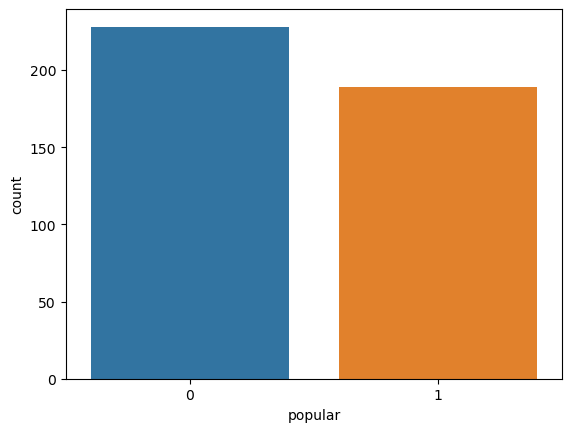

In [65]:
print(data['popular'].value_counts())
sns.countplot(data,x='popular')

Data distribution is not heavily biased towards either popularity status.

# Train test splitting

In [66]:
X = data.drop('popular', axis=1)
y = data['popular']

In [67]:
X.head()

,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,artist_JEON SOMI,artist_MAMAMOO,artist_Others,artist_Red Velvet,artist_SEVENTEEN,artist_Stray Kids,artist_TOMORROW X TOGETHER,artist_TWICE,artist_aespa,artist_j-hope
0,168.227,0,0.826,0.553,1,-10.121,0,0.2340,0.16300,0.000041,...,0,0,1,0,0,0,0,0,0,0
1,169.566,0,0.752,0.642,3,-5.165,0,0.0869,0.08610,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,200.689,0,0.804,0.652,8,-6.282,1,0.0898,0.02670,0.000782,...,0,0,1,0,0,0,0,0,0,0
3,207.481,0,0.566,0.716,1,-5.733,1,0.0424,0.00691,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,199.053,0,0.746,0.765,6,-4.410,0,0.0993,0.01120,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: popular, dtype: int32

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (312, 29)
X_test:  (105, 29)
y_train:  (312,)
y_test:  (105,)


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# Model 1: Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

# Predict values
y_train_pred_logreg = logreg.predict(X_train)
y_test_pred_logreg = logreg.predict(X_test)

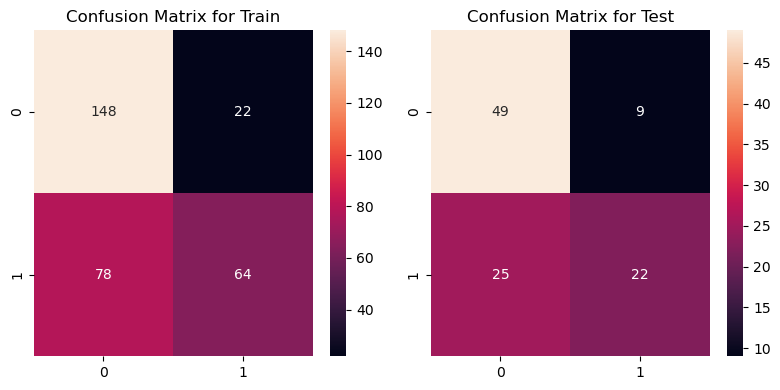

In [73]:
cm_train = confusion_matrix(y_train, y_train_pred_logreg)
cm_test = confusion_matrix(y_test, y_test_pred_logreg)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [74]:
# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validated Accuracy Scores:", accuracy_scores)

# Calculate and print the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("Mean CV Accuracy Score:", mean_accuracy)

print("Accuracy score on test: ",accuracy_score(y_test,y_test_pred_logreg))

Cross-Validated Accuracy Scores: [0.6984127  0.55555556 0.48387097 0.58064516 0.58064516]
Mean CV Accuracy Score: 0.5798259088581669
Accuracy score on test:  0.6761904761904762


In [75]:
# Predict probabilities on the test data
y_probs_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_logreg = roc_auc_score(y_test, y_probs_logreg)

# Print the ROC AUC score
print("ROC AUC Score:", roc_auc_logreg)

ROC AUC Score: 0.7503668378576669


## optimising log reg model

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'penalty': ['l1', 'l2'],
                'C': [0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 1000, 10000],
                'solver':['liblinear','saga']}

lr_grid = GridSearchCV(LogisticRegression(random_state=0), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
lr_grid.fit(X_train,y_train)

print ('Best Parameters for grid search: ', lr_grid.best_params_, ' \n')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Parameters for grid search:  {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}  



In [77]:
logreg_grid = lr_grid.best_estimator_
y_train_pred_lr = logreg_grid.predict(X_train)
y_test_pred_lr = logreg_grid.predict(X_test)

lr_accuracy = accuracy_score(y_test,y_test_pred_lr)
lr_cv_accuracy = (cross_val_score(logreg_grid, X_train, y_train, cv=5, scoring='accuracy')).mean()
lr_roc_auc = roc_auc_score(y_test, logreg_grid.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", lr_cv_accuracy)
print("Accuracy of test predictions: ", lr_accuracy)
print("ROC-AUC score: ", lr_roc_auc)

Mean cross validation accuracy:  0.5929851510496672
Accuracy of test predictions:  0.6571428571428571
ROC-AUC score:  0.7455979457079971


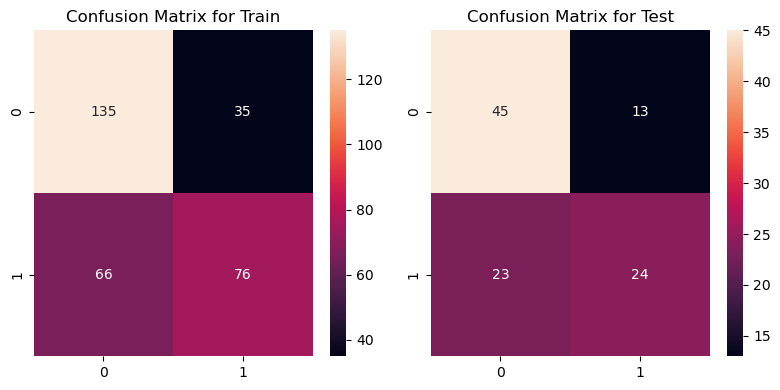

In [78]:
cm_train = confusion_matrix(y_train, y_train_pred_lr)
cm_test = confusion_matrix(y_test, y_test_pred_lr)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Model 2: Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(X_train,y_train)
y_train_pred_rf_clf = rf_clf.predict(X_train)
y_test_pred_rf_clf = rf_clf.predict(X_test)

In [80]:
rf_accuracy = accuracy_score(y_test,y_test_pred_rf_clf)
rf_cv_accuracy = (cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')).mean()
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", rf_cv_accuracy)
print("Accuracy of test predictions: ", rf_accuracy)
print("ROC-AUC score: ", rf_roc_auc)

Mean cross validation accuracy:  0.5835125448028673
Accuracy of test predictions:  0.6095238095238096
ROC-AUC score:  0.6335289801907557


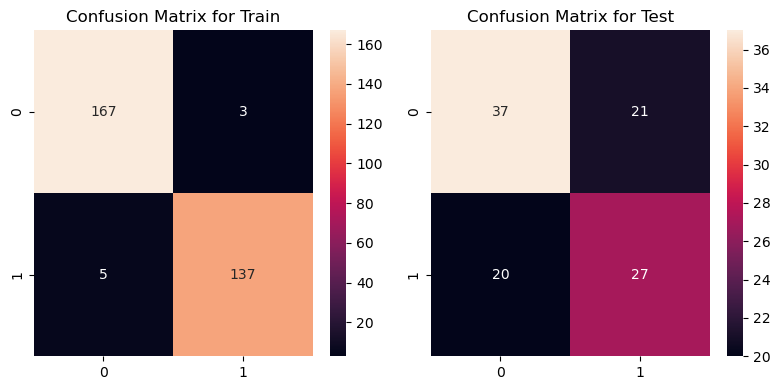

In [81]:
cm_train = confusion_matrix(y_train, y_train_pred_rf_clf)
cm_test = confusion_matrix(y_test, y_test_pred_rf_clf)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

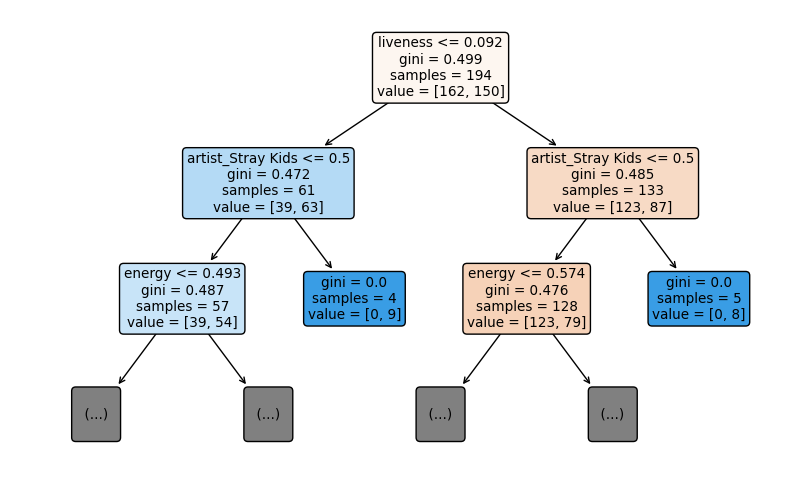

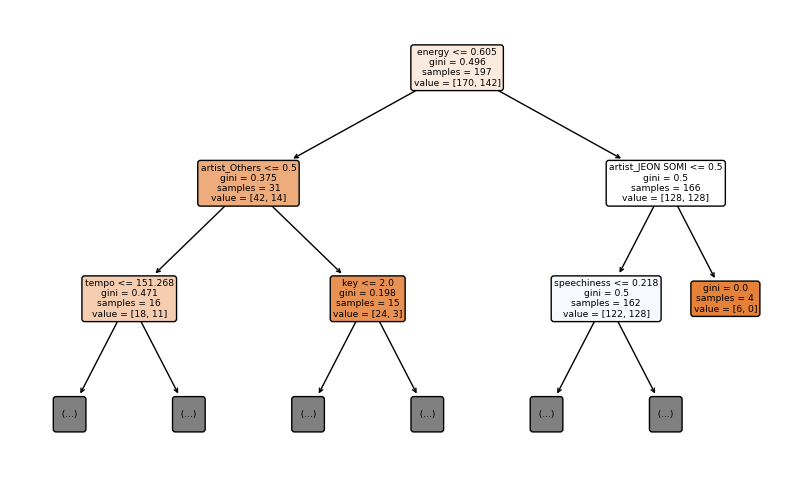

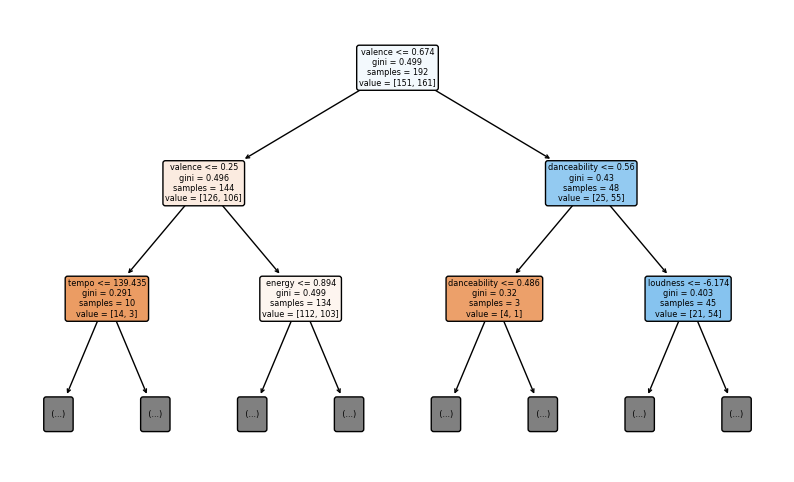

In [82]:
from sklearn import tree
# Plot the first three trees from the random forest
for i in range(3):
    plt.figure(figsize=(10, 6))
    tree.plot_tree(rf_clf.estimators_[i], feature_names=X_train.columns, filled=True, 
                   rounded= True, max_depth=2)
    plt.show()


Similarly, we will tune hyperparameters of Random Forest:
- max_depth
- n_estimators
- max_features


**GridSearchCV**

In [83]:
n_estimators_values = [100,300,500,1000]
param_grid_1 = {'n_estimators': n_estimators_values}
rf_grid1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid_1, cv=10, n_jobs=-1)
rf_grid1.fit(X_train, y_train)

# Get the results of the grid search
n_estimators_scores =rf_grid1.cv_results_['mean_test_score']

# Plot the graph using Plotly
fig = go.Figure(data=go.Scatter(x=n_estimators_values, y=n_estimators_scores, mode='markers+lines'))
fig.update_layout(
    title='Accuracy vs n_estimators',
    xaxis_title='n_estimators',
    yaxis_title='Accuracy')

fig.show()


In [84]:
depth = list(range(1,31))
param_grid_2 = {'max_depth' : depth}

rf_grid2 = GridSearchCV(rf_grid1.best_estimator_, param_grid_2, cv=10, n_jobs=-1)
rf_grid2.fit(X_train, y_train)

# Get the results of the grid search
depth_scores =rf_grid2.cv_results_['mean_test_score']

# Plot the graph using Plotly
fig = go.Figure(data=go.Scatter(x=depth, y=depth_scores, mode='markers+lines'))
fig.update_layout(
    title='Accuracy vs Max Depth',
    xaxis_title='max_depth',
    yaxis_title='Accuracy')

fig.show()

In [85]:
param_grid_3 = {'max_features': [None, 'sqrt','log2']}

rf_grid3 = GridSearchCV(rf_grid2.best_estimator_,param_grid=param_grid_3, cv=10, n_jobs=-1)

rf_grid3.fit(X_train, y_train)
print ('Best Parameters for grid search: ', rf_grid3.best_params_, ' \n')

Best Parameters for grid search:  {'max_features': 'sqrt'}  



In [86]:
rfc_best = RandomForestClassifier(random_state=0, max_depth=25, n_estimators=500, max_features='sqrt')
rfc_best.fit(X_train,y_train)
y_train_pred_rfc = rfc_best.predict(X_train)
y_test_pred_rfc = rfc_best.predict(X_test)

rfc_accuracy = accuracy_score(y_test,y_test_pred_rfc)
rfc_cv_accuracy = (cross_val_score(rfc_best, X_train, y_train, cv=5, scoring='accuracy')).mean()
rfc_roc_auc = roc_auc_score(y_test, rfc_best.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", rfc_cv_accuracy)
print("Accuracy of test predictions: ", rfc_accuracy)
print("ROC-AUC score: ", rfc_roc_auc)

Mean cross validation accuracy:  0.5704557091653866
Accuracy of test predictions:  0.6095238095238096
ROC-AUC score:  0.634079236977256


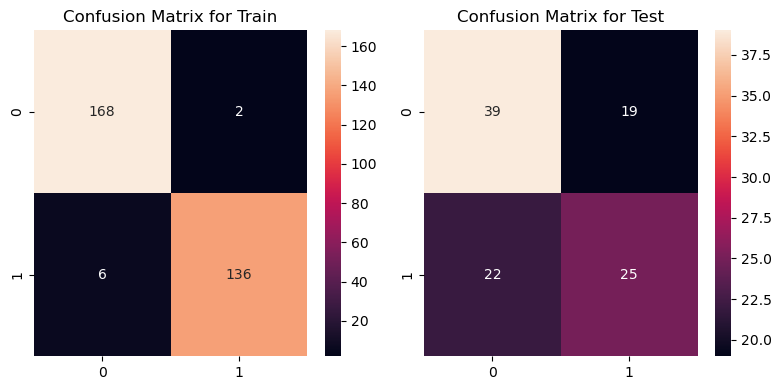

In [87]:
cm_train = confusion_matrix(y_train, y_train_pred_rfc)
cm_test = confusion_matrix(y_test, y_test_pred_rfc)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

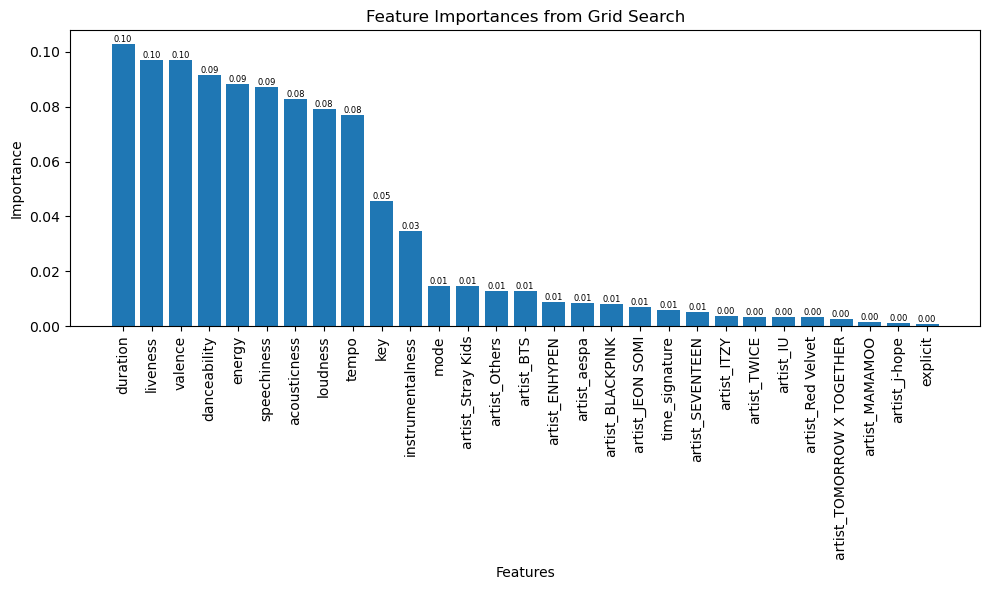

In [88]:
# Get feature importances from the random forest regressor
importances = rfc_best.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Grid Search")
plt.bar(range(len(importances)), importances[indices], align="center")

# Add label values on top of the bars
for i, index in enumerate(indices):
    plt.text(i, importances[index], f"{importances[index]:.2f}", ha='center', va='bottom', fontsize=6)

plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

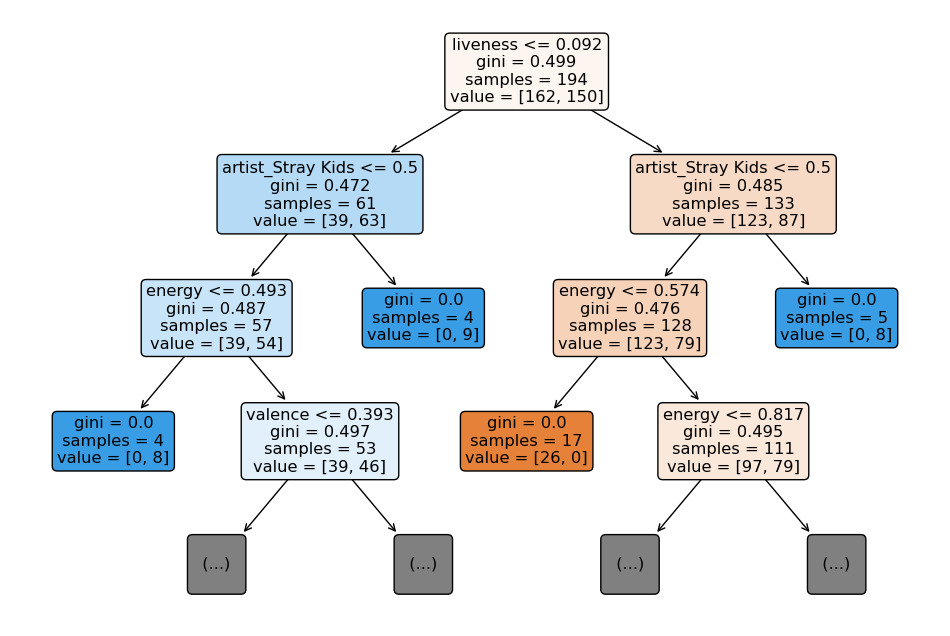

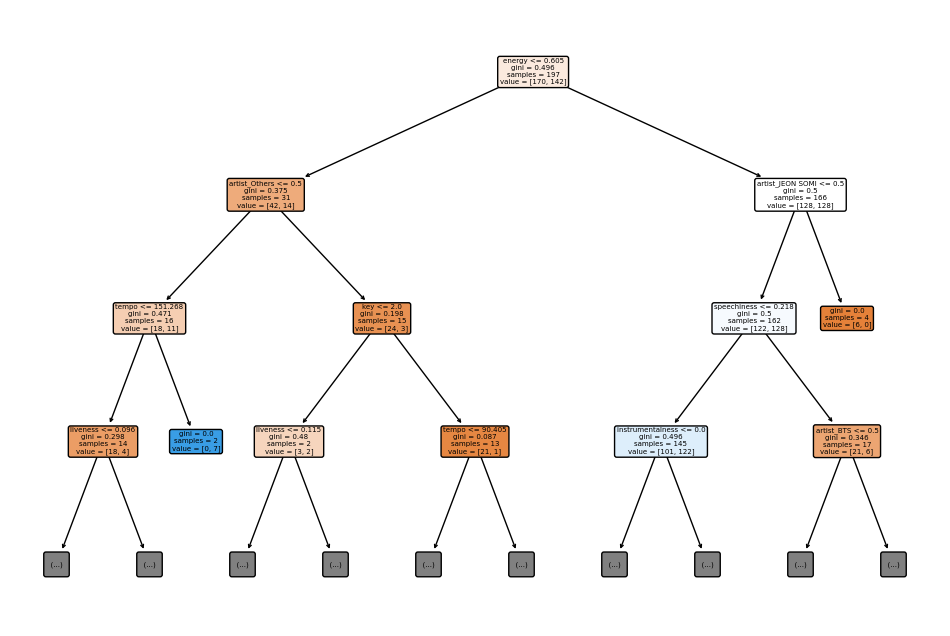

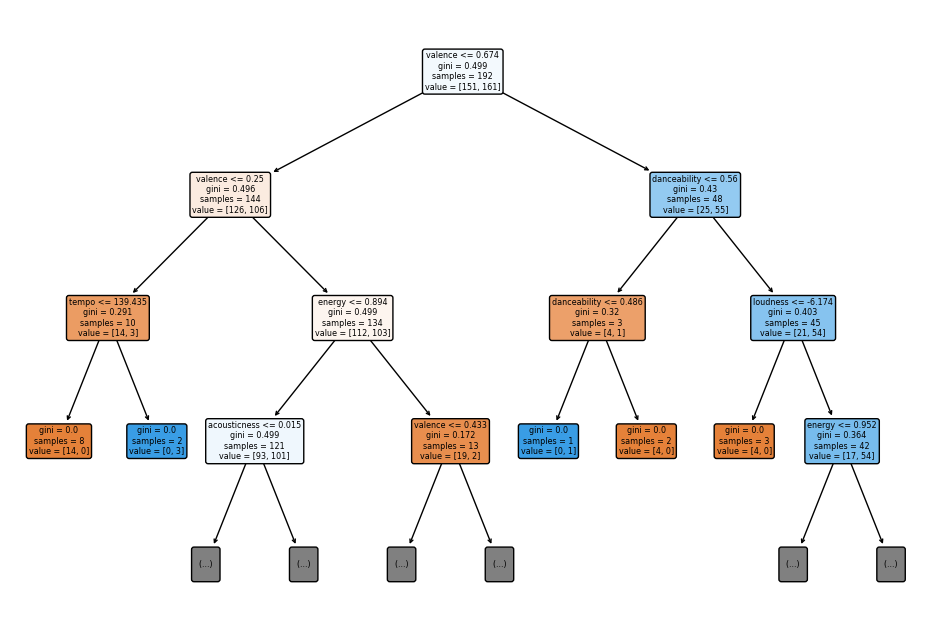

In [89]:
# Plot the first three trees from the random forest
for i in range(3):
    plt.figure(figsize=(12,8))
    tree.plot_tree(rfc_best.estimators_[i], feature_names=X_train.columns, filled=True, 
                   rounded= True, max_depth=3)
    plt.show()

# Model 3: SVC Classifier

In [90]:
from sklearn.svm import SVC
svc = SVC(probability=True)

In [92]:
svc.fit(X_train, y_train)
y_train_pred_svc =svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

svc_accuracy = accuracy_score(y_test,y_test_pred_svc)
svc_cv_accuracy = (cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')).mean()
svc_roc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", svc_cv_accuracy)
print("Accuracy of test predictions: ", svc_accuracy)
print("ROC-AUC score: ", svc_roc_auc)

Mean cross validation accuracy:  0.544905273937532
Accuracy of test predictions:  0.5523809523809524
ROC-AUC score:  0.3053925165077036


In [93]:
params_svc = {'kernel': ['rbf','linear','poly'],'C': [0.1,1,10]}
svc_grid = GridSearchCV(svc, params_svc, cv=10, n_jobs=-1)
svc_grid.fit(X_train, y_train)

best_params = svc_grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'C': 1, 'kernel': 'linear'}


In [94]:
print("Best score: ", svc_grid.best_score_)

Best score:  0.608366935483871


In [95]:
best_svc = svc_grid.best_estimator_
y_train_pred_svc1 = best_svc.predict(X_train)
y_test_pred_svc1 = best_svc.predict(X_test)

svc_accuracy1 = accuracy_score(y_test,y_test_pred_svc1)
svc_cv_accuracy1 = (cross_val_score(best_svc, X_train, y_train, cv=5, scoring='accuracy')).mean()
svc_roc_auc1 = roc_auc_score(y_test, best_svc.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", svc_cv_accuracy1)
print("Accuracy of test predictions: ", svc_accuracy1)
print("ROC-AUC score: ", svc_roc_auc1)

Mean cross validation accuracy:  0.5959037378392217
Accuracy of test predictions:  0.6761904761904762
ROC-AUC score:  0.7239545121056493


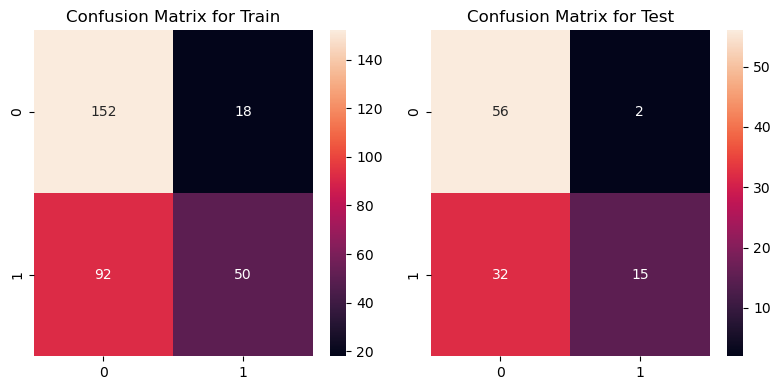

In [96]:
cm_train = confusion_matrix(y_train, y_train_pred_svc1)
cm_test = confusion_matrix(y_test, y_test_pred_svc1)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Model 4: XGBoost Classifier

In [97]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(objective='binary:logistic')

In [98]:
xgb_clf.fit(X_train,y_train)
y_train_pred_xgb_clf = xgb_clf.predict(X_train)
y_test_pred_xgb_clf = xgb_clf.predict(X_test)

xgb_accuracy = accuracy_score(y_test,y_test_pred_xgb_clf)
xgb_cv_accuracy = (cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')).mean()
xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", xgb_cv_accuracy)
print("Accuracy of test predictions: ", xgb_accuracy)
print("ROC-AUC score: ", xgb_roc_auc)

Mean cross validation accuracy:  0.5830517153097798
Accuracy of test predictions:  0.5714285714285714
ROC-AUC score:  0.6065663976522377


In [99]:
parameters = {'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [100,300,500]}

xgb_grid = GridSearchCV(xgb_clf,
                        parameters,
                        cv = 10,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.5, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01],
                         'max_depth': [3, 5, 7], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.1, 0.5, 1.0]})

In [46]:
best_params = xgb_grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 300, 'subsample': 1.0}


In [100]:
best_xgb_clf = xgb_grid.best_estimator_

y_train_pred_xgbclf = best_xgb_clf.predict(X_train)
y_test_pred_xgbclf = best_xgb_clf.predict(X_test)

xgbc_accuracy = accuracy_score(y_test,y_test_pred_xgbclf)
xgbc_cv_accuracy = (cross_val_score(best_xgb_clf, X_train, y_train, cv=5, scoring='accuracy')).mean()
xgbc_roc_auc = roc_auc_score(y_test, best_xgb_clf.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", xgbc_cv_accuracy)
print("Accuracy of test predictions: ", xgbc_accuracy)
print("ROC-AUC score: ", xgbc_roc_auc)

Mean cross validation accuracy:  0.5990783410138248
Accuracy of test predictions:  0.580952380952381
ROC-AUC score:  0.6208730741012473


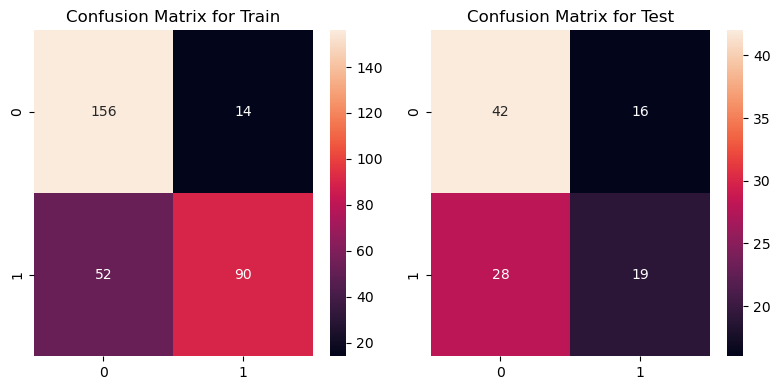

In [101]:
cm_train = confusion_matrix(y_train, y_train_pred_xgbclf)
cm_test = confusion_matrix(y_test, y_test_pred_xgbclf)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

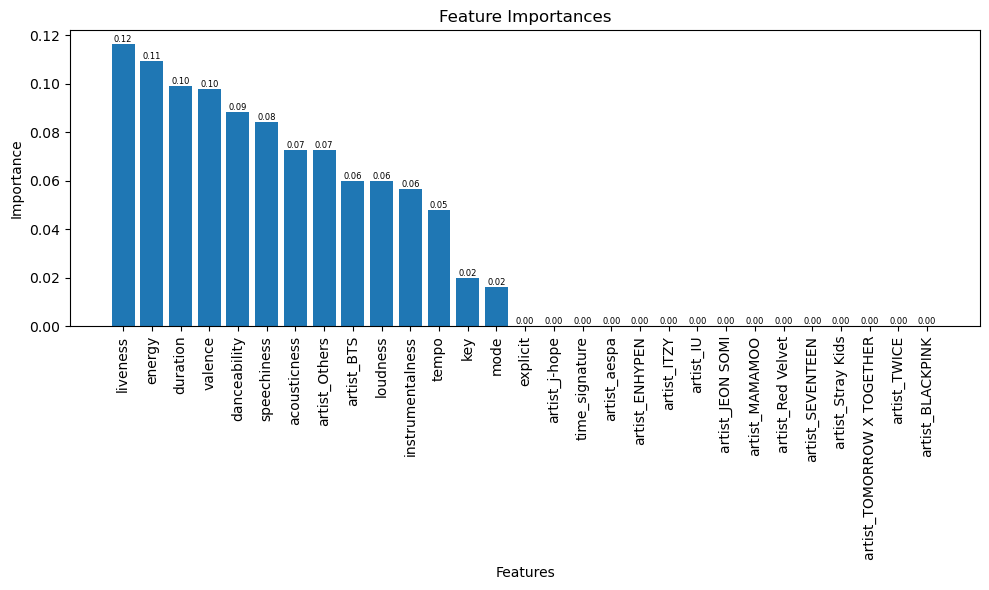

In [102]:
importances = best_xgb_clf.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")

# Add label values on top of the bars
for i, index in enumerate(indices):
    plt.text(i, importances[index], f"{importances[index]:.2f}", ha='center', va='bottom', fontsize=6)

plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Model 5: KNN Classifier
We need scaled data, we would be using the one that has been normalised with MinMaxScaler.

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

knn.fit(X_train,y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test,y_test_pred_knn)
knn_cv_accuracy = (cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')).mean()
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", knn_cv_accuracy)
print("Accuracy of test predictions: ", knn_accuracy)
print("ROC-AUC score: ", knn_roc_auc)

Mean cross validation accuracy:  0.5449564772145418
Accuracy of test predictions:  0.6761904761904762
ROC-AUC score:  0.6968085106382979


Text(0, 0.5, 'Mean error')

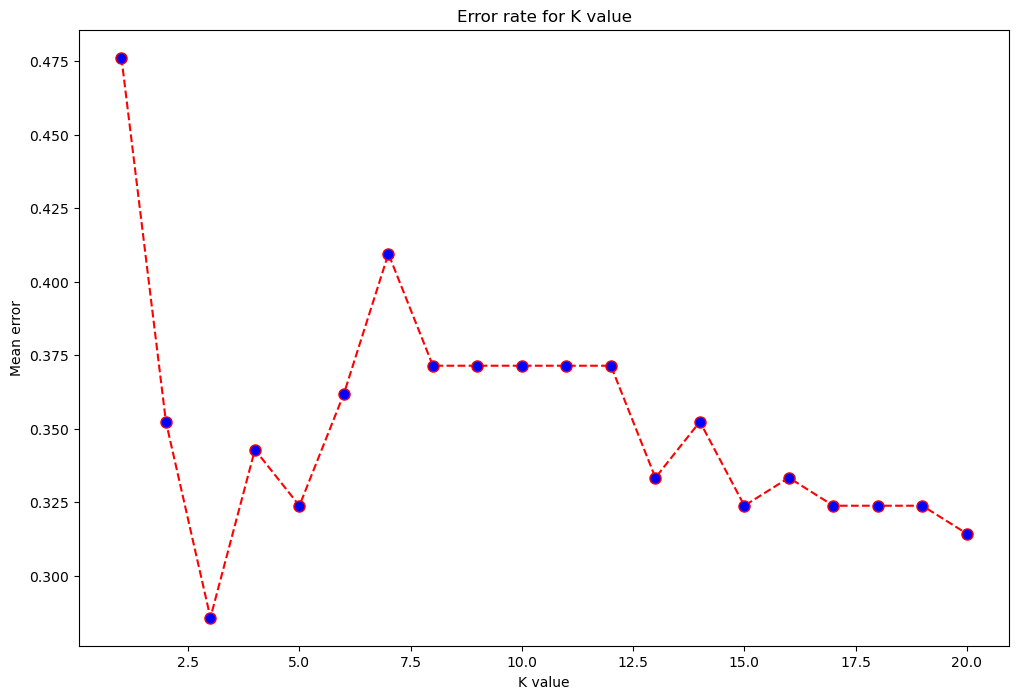

In [104]:
# finding optimal value for k using error plots

error = []

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,8))
plt.plot(range(1,21), error, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=8)

plt.title('Error rate for K value')
plt.xlabel('K value')
plt.ylabel('Mean error')

n_neighbors = 3 (Lowest mean error)

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)
param_grid = {'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn_grid = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1)
knn_grid.fit(X_train,y_train)
print("Best parameters are: ", knn_grid.best_params_)

Best parameters are:  {'metric': 'euclidean', 'weights': 'uniform'}


In [106]:
best_knn = knn_grid.best_estimator_
y_train_pred_knn1 = best_knn.predict(X_train)
y_test_pred_knn1 = best_knn.predict(X_test)

knn_accuracy1 = accuracy_score(y_test,y_test_pred_knn1)
knn_cv_accuracy1 = (cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')).mean()
knn_roc_auc1 = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
print("Mean cross validation accuracy: ", knn_cv_accuracy1)
print("Accuracy of test predictions: ", knn_accuracy1)
print("ROC-AUC score: ", knn_roc_auc1)

Mean cross validation accuracy:  0.5706605222734255
Accuracy of test predictions:  0.7142857142857143
ROC-AUC score:  0.6826852531181218


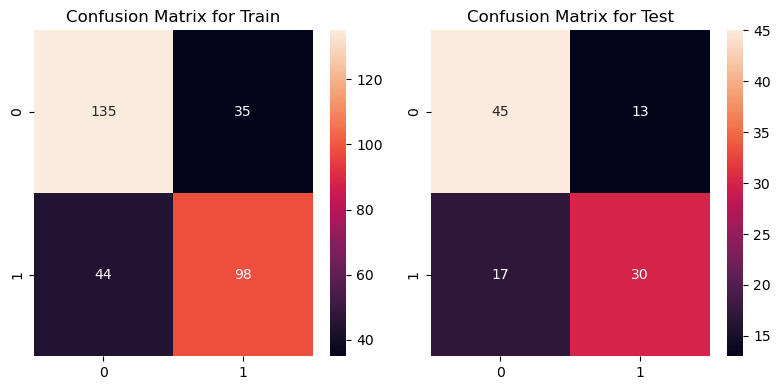

In [107]:
cm_train = confusion_matrix(y_train, y_train_pred_knn1)
cm_test = confusion_matrix(y_test, y_test_pred_knn1)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Confusion matrix for train
axs[0].set_title('Confusion Matrix for Train')
sns.heatmap(cm_train, annot=True, fmt='d', ax=axs[0])

# Confusion matrix for test
axs[1].set_title('Confusion Matrix for Test')
sns.heatmap(cm_test, annot=True, fmt='d', ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# FINAL PERFORMANCE COMPARISON

In [108]:
results = {
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'SVM Classifier', 'XGBoost Classifier','KNN Classifier'],
    'Mean CV accuracy': [lr_cv_accuracy,rfc_cv_accuracy,svc_cv_accuracy1,xgbc_cv_accuracy,knn_cv_accuracy1],
    'Test Accuracy': [lr_accuracy,rfc_accuracy,svc_accuracy1,xgbc_accuracy,knn_accuracy1],
    'ROC-AUC score': [lr_roc_auc,rfc_roc_auc,svc_roc_auc1,xgbc_roc_auc,knn_roc_auc1]
}

results_df = pd.DataFrame(results)
results_df

,Model,Mean CV accuracy,Test Accuracy,ROC-AUC score
0,Logistic Regression,0.592985,0.657143,0.745598
1,Random Forest Classifier,0.570456,0.609524,0.634079
2,SVM Classifier,0.595904,0.676190,0.723955
3,XGBoost Classifier,0.599078,0.580952,0.620873
4,KNN Classifier,0.570661,0.714286,0.682685


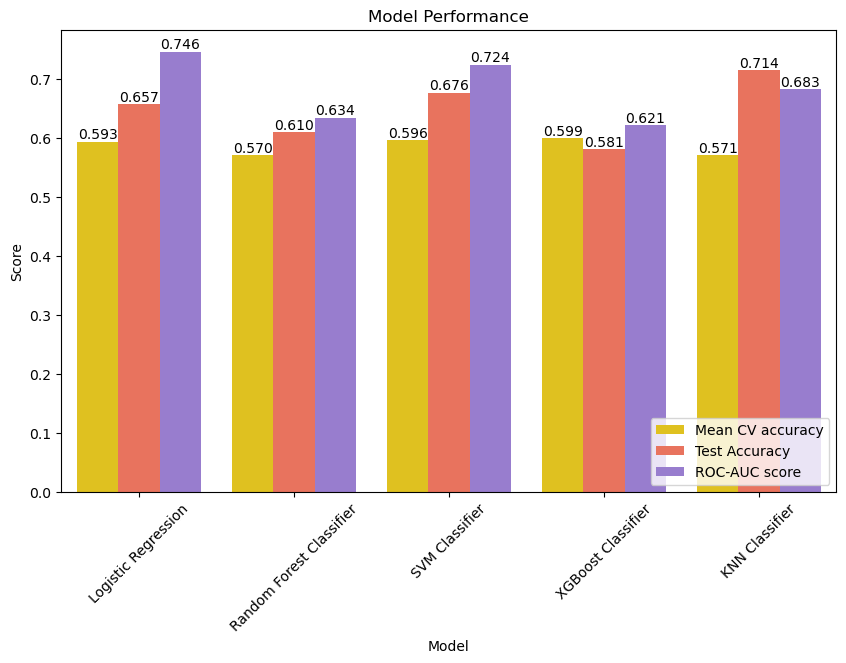

In [109]:
# Set the Model column as the index
results_df.set_index('Model', inplace=True)

# Reset the index for plotting
results_df.reset_index(inplace=True)

# Melt the dataframe to create the plot
results_df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define the color palette
color_palette = ['#FFD700', '#FF6347', '#9370DB']

# Plot the bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted, palette=color_palette)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='lower right')

# Add label values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

Choose SVM classifier given its consistent high performance across metrics. A good alternative would be KNN Classifier if were to only consider the best test accuracy performance.

In [111]:
svm_model = svc_grid.best_estimator_
import pickle

# Create a file object to write the model to
with open("best_model.pkl", "wb") as file:

    # Use the pickle.dump() function to serialize the model to the file object
    pickle.dump(svm_model, file)

# Close the file object
file.close()

In [112]:
feature_names = X_train.columns.tolist()
print(feature_names)

['duration', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'artist_BLACKPINK', 'artist_BTS', 'artist_ENHYPEN', 'artist_ITZY', 'artist_IU', 'artist_JEON SOMI', 'artist_MAMAMOO', 'artist_Others', 'artist_Red Velvet', 'artist_SEVENTEEN', 'artist_Stray Kids', 'artist_TOMORROW X TOGETHER', 'artist_TWICE', 'artist_aespa', 'artist_j-hope']


In [113]:
with open ("feature_names.pkl","wb") as file:
    pickle.dump(feature_names, file)

file.close()